<a href="https://colab.research.google.com/github/You-Hyun/python-class/blob/main/OSTIA_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **UK Met Office Sea Surface Temperature (SST) netCDF4 파일을 이용한 데이터 시각화**
## **[목표]**
### **netCDF4 형식의 전 지구 해수면온도 데이터를 읽고 원하는 영역(지역)에 대해 공간분포를 시각화하고자 한다.**

---

## **[목차]**
### **1.   자료 설명**
### **2.   필요 모듈 설치**
### **3.   자료 다운로드**
### **4.   필요 모듈 불러오기**
### **5.   NetCDF 파일 불러오기**
### **6.   시각화**
### **7.   실습**
---

## **1. 자료 설명**

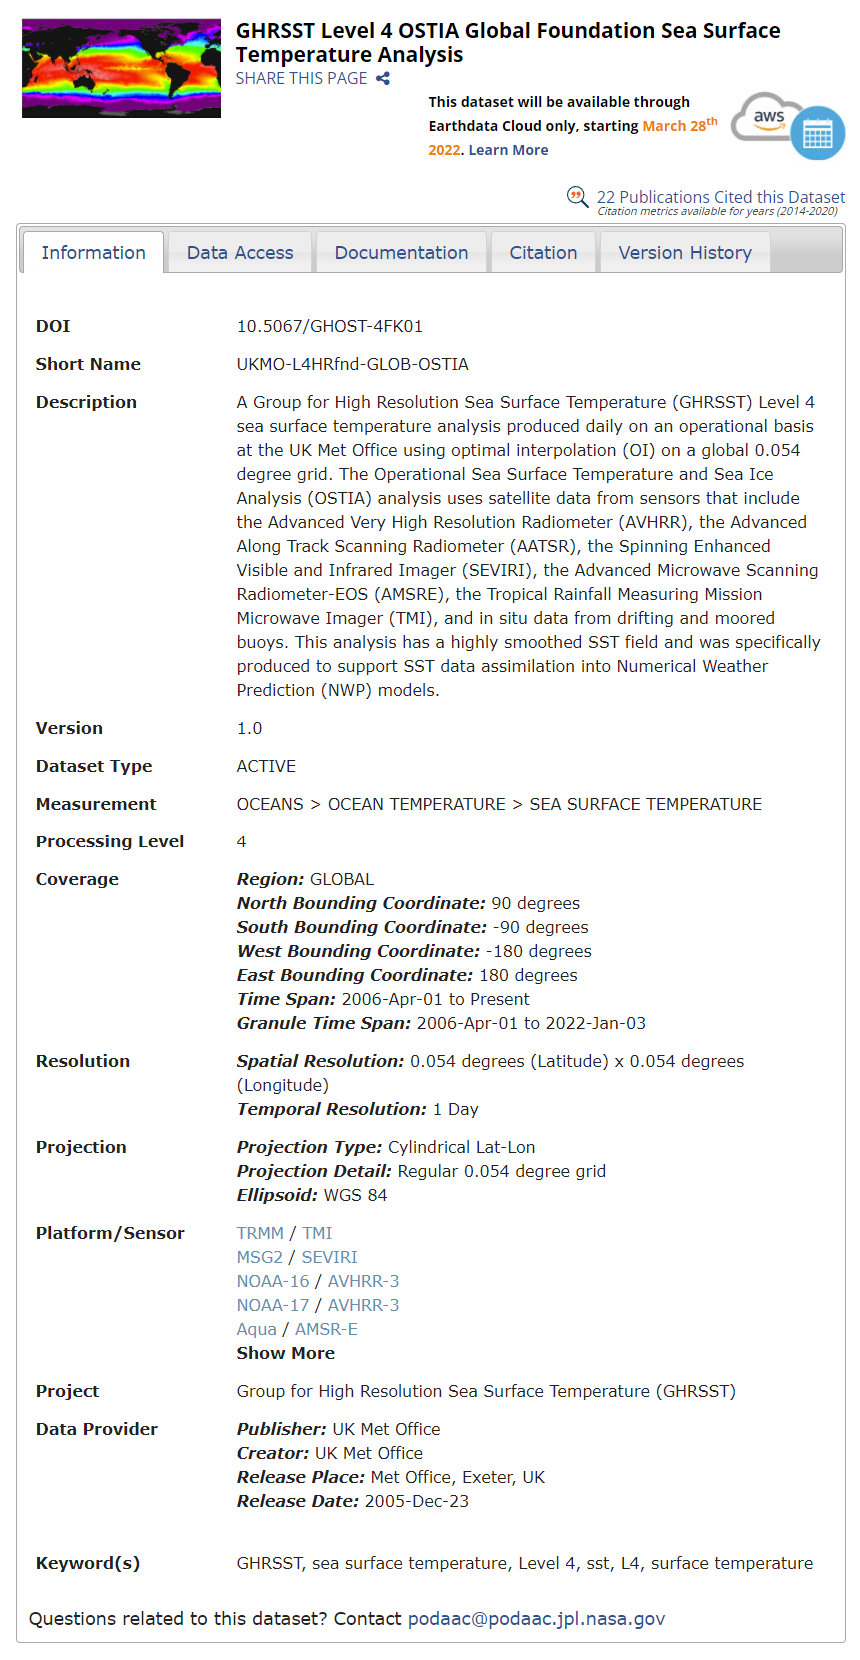
#### *** 자료 설명** : [https://podaac.jpl.nasa.gov/dataset/UKMO-L4HRfnd-GLOB-OSTIA#](https://podaac.jpl.nasa.gov/dataset/UKMO-L4HRfnd-GLOB-OSTIA#)

---
## **2. 필요 모듈 설치**



*   ### **wget  : 웹서버 (HTTP, HTTPS, FTP 등)로 부터 여러 콘텐츠를 가져 오는 모듈** 
*   ### **basemap : 지도를 이용한 다양한 데이터 시각화를 위해 사용되는 모듈**



In [ ]:
!pip install wget    # wget 모듈 설치
!pip install basemap # basemap 모듈 설치

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=5dfe53fac5268984284e3b14b36d401a6a223f279c686ba38e992aa586ff6838
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget
     |████████████████████████████████| 858 kB 5.1 MB/s 
     |████████████████████████████████| 30.5 MB 1.5 MB/s 
     |████████████████████████████████| 219 kB 73.7 MB/s 
     |████████████████████████████████| 6.3 MB 62.8 MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any.whl size=37325 sha256=8e921ddb51c410686e271f7b4e54b5d89c6d16a124f40dc561fef260acd7f175
  Stored in directory: /root/.cache/pip/wheels/43/f8/87/53c8cd41545ba20e536ea29a8fcb5431b5f477ca50d5dffbbe
Successfully built pyshp


---
## **3. 자료 다운로드**

* ### **자료위치 :** [https://www.ncei.noaa.gov/data/oceans/ghrsst/L4/GLOB/UKMO/OSTIA/](https://www.ncei.noaa.gov/data/oceans/ghrsst/L4/GLOB/UKMO/OSTIA/)

* ### **원하는 다운로드 날짜 선정과 Calendar date에서 Julian date 변경 필요**

---


### **3.1 다운로드 날짜 선정**
* **2018년 한반도 영향 태풍인 SOULIK(1819)시기에 대해 자료 다운로드**


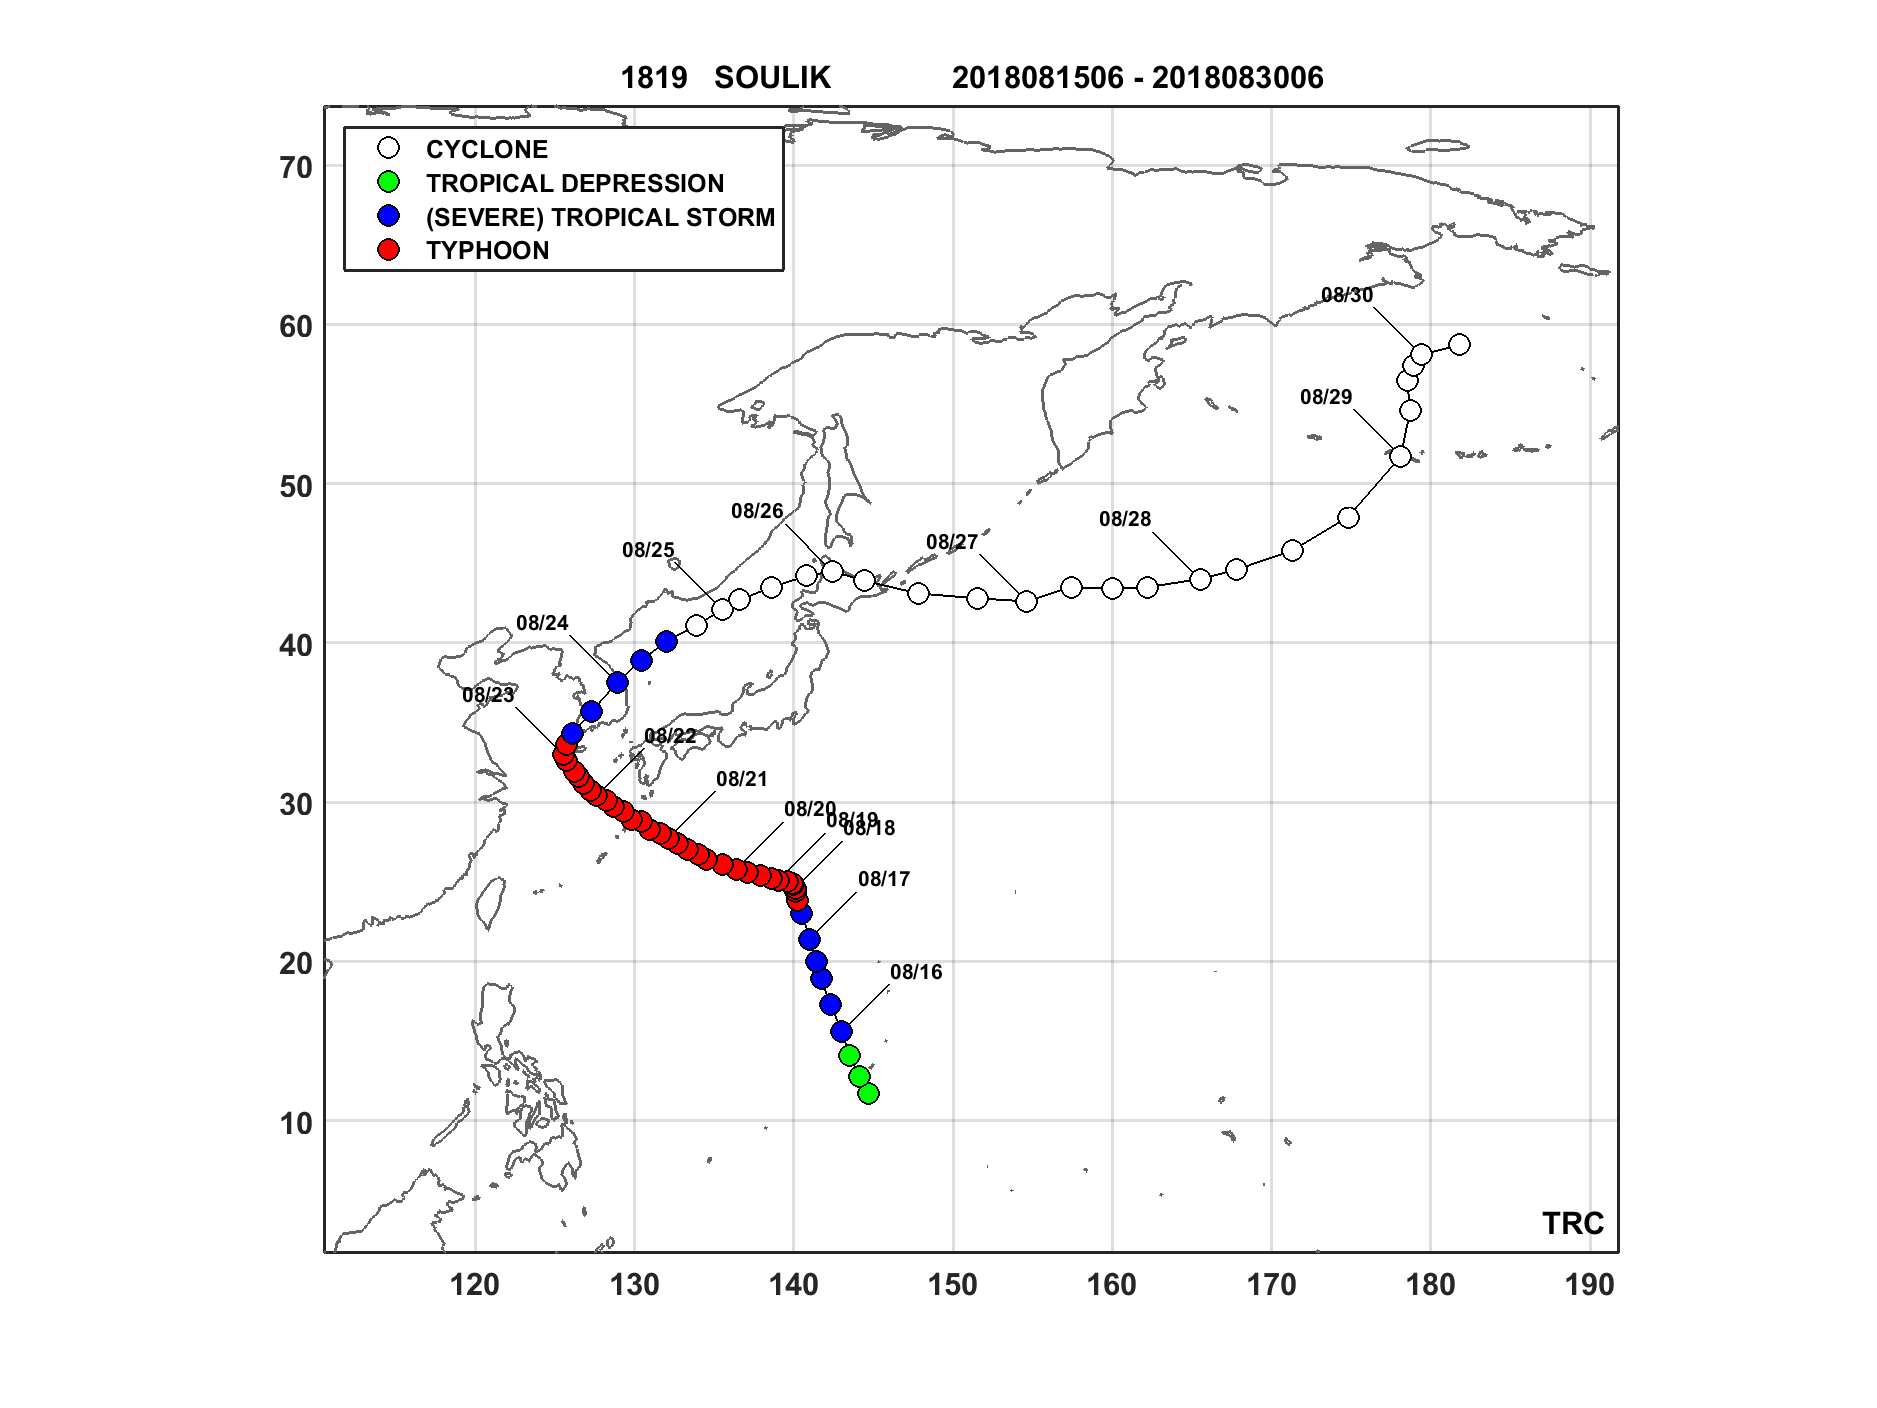

**출처 : 태풍연구센터** [http://www.typhoon.or.kr/](http://www.typhoon.or.kr/)

### **3.2 Calendar date에서 Julian date 변경**
* **datetime 모듈의 date.toordinal를 이용하여 Julian date 계산** 
* **Julian date : 기원전 4713년 1월 1일을 기점으로 계산한 날짜 수(datetime 모듈에서는 1년 1월 1일이 기점)**
* **date.toordinal : 1년1월1일 이후로 date객체까지 누적된 날짜 수를 반환**



In [ ]:
import datetime                                                                 # datetime 모듈 불러오기

Ref_date=datetime.date.toordinal(datetime.date(1, 1, 1))                        # 기준되는 날짜 (1년 1월 1일)
print('Reference julian date : ', Ref_date)

Reference julian date :  1


In [ ]:
Ref_date=datetime.date.toordinal(datetime.date(2022, 1, 20))                    # 기준되는 날짜 (2022년 1월 20일)
print('Reference julian date : ', Ref_date)

Reference julian date :  738175


In [ ]:
Ref_date=datetime.date.toordinal(datetime.date(2018, 1, 1))                     # 기준되는 날짜 (2018년 1월 1일)
Target_date=datetime.date.toordinal(datetime.date(2018, 8, 25))                 # 다운로드 날짜 (2018년 8월 25일)
OSTIA_DATE=(Target_date-Ref_date)+1
print('Target julian date : ', OSTIA_DATE)

Target julian date :  237


### **3.3 자료 다운로드**
* **태풍 SOULIK시기인 2018년 8월 25일에 대해 OSTIA 해수면온도 자료 다운로드** 



In [ ]:
OSTIA_URL='https://www.ncei.noaa.gov/data/oceans/ghrsst/L4/GLOB/UKMO/OSTIA/2018/' + str(237) + '/20180825120000-UKMO-L4_GHRSST-SSTfnd-OSTIA-GLOB-v02.0-fv02.0.nc	'   # 2018년 8월 25일 OSTIA 해수면온도 데이터의 URL 정의
print(OSTIA_URL)

https://www.ncei.noaa.gov/data/oceans/ghrsst/L4/GLOB/UKMO/OSTIA/2018/237/20180825120000-UKMO-L4_GHRSST-SSTfnd-OSTIA-GLOB-v02.0-fv02.0.nc	


In [ ]:
import wget                                                                     # wget 모듈 불러오기
wget.download(OSTIA_URL)                                                        # wget.download 패키지를 이용하여 2018년 8월 20일 OSTIA 해수면온도 데이터 다운로드

'20180825120000-UKMO-L4_GHRSST-SSTfnd-OSTIA-GLOB-v02.0-fv02.0.nc'

In [ ]:
!ls   # 2018년 8월 25일 OSTIA 해수면온도 데이터 다운로드 여부 확인

20180825120000-UKMO-L4_GHRSST-SSTfnd-OSTIA-GLOB-v02.0-fv02.0.nc  sample_data


---
## **4. 필요 모듈 불러오기**

* ### **netCDF**
* ### **numpy**
* ### **matplotlib**
* ### **Basemap**
---

In [ ]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [ ]:
whos                                                                            # 호출된 모듈 및 선언된 변수 확인

Variable      Type      Data/Info
---------------------------------
Basemap       type      <class 'mpl_toolkits.basemap.Basemap'>
Dataset       type      <class 'netCDF4._netCDF4.Dataset'>
OSTIA_DATE    int       237
OSTIA_URL     str       https://www.ncei.noaa.gov<...>TIA-GLOB-v02.0-fv02.0.nc	
Ref_date      int       736695
Target_date   int       736931
datetime      module    <module 'datetime' from '<...>b/python3.7/datetime.py'>
np            module    <module 'numpy' from '/us<...>kages/numpy/__init__.py'>
plt           module    <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
wget          module    <module 'wget' from '/usr<...>7/dist-packages/wget.py'>


---
## **5. NetCDF 파일 불러오기**

In [ ]:
OSTIA_file=Dataset('20180825120000-UKMO-L4_GHRSST-SSTfnd-OSTIA-GLOB-v02.0-fv02.0.nc') # Dateset 함수를 통해 OSTIA 해수면온도 netCDF file 지정

In [ ]:
OSTIA_file    # 지정된 OSTIA 해수면온도 netCDF file 정보 확인

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.4
    title: Global SST & Sea Ice Analysis, L4 OSTIA, 0.05 deg daily (METOFFICE-GLO-SST-L4-NRT-OBS-SST-V2)
    summary: A merged, multi-sensor L4 Foundation SST product
    references: Donlon, C.J., Martin, M., Stark, J.D., Roberts-Jones, J., Fiedler, E., Wimmer, W., 2011. The Operational Sea Surface Temperature and Sea Ice Analysis (OSTIA). Remote Sensing of the Environment
    institution: UKMO
    history: Created from sst:temperature; error:/critical/fpos2/cylc-run/mi-au175/share/cycle/20180826T0000Z/ostia/20180825-UKMO-L4HRfnd-GLOB-v01-fv02-OSTIA_err.nc; sea ice:seaice.nc
    comment: WARNING Some applications are unable to properly handle signed byte values. If values are encountered > 127, please subtract 256 from this reported value
    license: These data are available free of charge under the CMEMS data policy
    id: OSTIA-UKMO-L4-GLOB-v2.0
    naming_authority: org.gh

### **5.1 변수 불러오기**
* **위/경도, 해수면온도 변수 및 정보 불러오기** 


In [ ]:
lon_info=OSTIA_file.variables['lon']                                            # 경도 정보 저장
lon=OSTIA_file.variables['lon'][:]                                              # 경도 값 선언

lat_info=OSTIA_file.variables['lat']                                            # 위도 정보 저장
lat=OSTIA_file.variables['lat'][:]                                              # 위도 값 선언

mask_info=OSTIA_file.variables['mask']                                          # Land/Ocean mask 정보 저장
mask=OSTIA_file.variables['mask'][:]                                            # Land/Ocean mask 값 선언

sst_info=OSTIA_file.variables['analysed_sst']                                   # 해수면온도 정보 저장
sst=OSTIA_file.variables['analysed_sst'][:]                                     # 해수면온도 값 선언

In [ ]:
sst_info                                                                        # 해수면온도 정보 확인

<class 'netCDF4._netCDF4.Variable'>
int16 analysed_sst(time, lat, lon)
    long_name: analysed sea surface temperature
    standard_name: sea_surface_foundation_temperature
    units: kelvin
    coordinates: lon lat
    _FillValue: -32768
    add_offset: 273.15
    scale_factor: 0.01
    valid_min: -300
    valid_max: 4500
    source: AVHRR18_G-NAVO-L2P-V1.0, AVHRR19_G-NAVO-L2P-V1.0, AVHRR_SST_METOP_B-OSISAF-L2P-V1.0, VIIRS_NPP-OSPO-L2P-V2.3, AMSR2-REMSS-L2P-V07.2, GOES13-OSISAF-L3C-V1.0, SEVIRI_SST-OSISAF-L3C-V1.0, OSISAF_ICE, NCEP_ICE
    reference: C.J. Donlon, M. Martin,J.D. Stark, J. Roberts-Jones, E. Fiedler, W. Wimmer. The operational sea surface temperature and sea ice analysis (OSTIA) system. Remote Sensing Environ., 116 (2012), pp. 140-158 http://dx.doi.org/10.1016/j.rse.2010.10.017
    comment:  OSTIA foundation SST
unlimited dimensions: 
current shape = (1, 3600, 7200)
filling on

In [ ]:
print('MAX_SST : ', np.max(sst))                                                # 해수면온도의 최소값 확인
print('MIN_SST : ', np.min(sst))                                                # 해수면온도의 최대값 확인
sst

MAX_SST :  307.72998
MIN_SST :  271.09


masked_array(
  data=[[[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [271.3999938964844, 271.3999938964844, 271.3999938964844, ...,
          271.3999938964844, 271.3999938964844, 271.3999938964844],
         [271.4100036621094, 271.4100036621094, 271.4100036621094, ...,
          271.4100036621094, 271.4100036621094, 271.4100036621094],
         [271.4100036621094, 271.4100036621094, 271.4100036621094, ...,
          271.4100036621094, 271.4100036621094, 271.4100036621094]]],
  mask=[[[ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]]],
  fill_value=-32768,
  dtype=float32)

In [ ]:
sst=sst-273.15                                                                  # kelvin (K)온도를 celsius (C) 온도로 변경
sst=sst.squeeze()                                                               # 3차원 array (1, 3600, 7200)의 해수면온도를 2차원 array (3600, 7200) 해수면온도로 변경

##**6. 시각화**


### **6.1 Basemap 설정**
* **Figure size 설정** 
* **도법 및 해상도 설정 ([https://matplotlib.org/basemap/users/mapsetup.html](https://matplotlib.org/basemap/users/mapsetup.html))** 
  - **Azimuthal Equidistant Projection**
  - **Gnomonic Projection**
  - **Orthographic Projection**
  - **Geostationary Projection**
  - **Near-Sided Perspective Projection**
  - **Mollweide Projection**
  - **Hammer Projection**
  - **Robinson Projection**
  - **Eckert IV Projection**
  - **Kavrayskiy VII Projection**
  - **McBryde-Thomas Flat Polar Quartic**
  - **Sinusoidal Projection**
  - **Equidistant Cylindrical Projection**
  - **Cassini Projection**
  - **Mercator Projection**
  - **Transverse Mercator Projection**
  - **Oblique Mercator Projection**
  - **Polyconic Projection**
  - **Miller Cylindrical Projection**
  - **Gall Stereographic Projection**
  - **Cylindrial Equal-Area Projection**
  - **Lambert Conformal Projection**
  - **Lambert Azimuthal Equal Area Projection**
  - **Stereographic Projection**
  - **Equidistant Conic Projection**
  - **Albers Equal Area Projection**
  - **Polar Stereographic Projection**
  - **Polar Lambert Azimuthal Projection**
  - **Polar Azimuthal Equidistant Projection**
  - **van der Grinten Projection**
* **위/경도 설정** 
* **해안선, 국경선, Land/ocean 색 설정**

{115: ([<matplotlib.lines.Line2D at 0x7f5fe25d4510>],
  [Text(3891.8205999638417, -51976.5099202511, '115°E')]),
 120: ([<matplotlib.lines.Line2D at 0x7f5fe25d4450>],
  [Text(556530.3457948293, -51976.5099202511, '120°E')]),
 125: ([<matplotlib.lines.Line2D at 0x7f5fe25d4550>],
  [Text(1113060.6915896586, -51976.5099202511, '125°E')]),
 130: ([<matplotlib.lines.Line2D at 0x7f5fe25ed350>],
  [Text(1669591.0373844882, -51976.5099202511, '130°E')]),
 135: ([<matplotlib.lines.Line2D at 0x7f5fe26e2d10>],
  [Text(2226121.383179317, -51976.5099202511, '135°E')]),
 140: ([<matplotlib.lines.Line2D at 0x7f5fe25ed810>],
  [Text(2782651.728974147, -51976.5099202511, '140°E')]),
 145: ([<matplotlib.lines.Line2D at 0x7f5fe25fd250>],
  [Text(3339182.0747689763, -51976.5099202511, '145°E')]),
 150: ([<matplotlib.lines.Line2D at 0x7f5fe25edd10>],
  [Text(3887928.779363878, -51976.5099202511, '150°E')])}

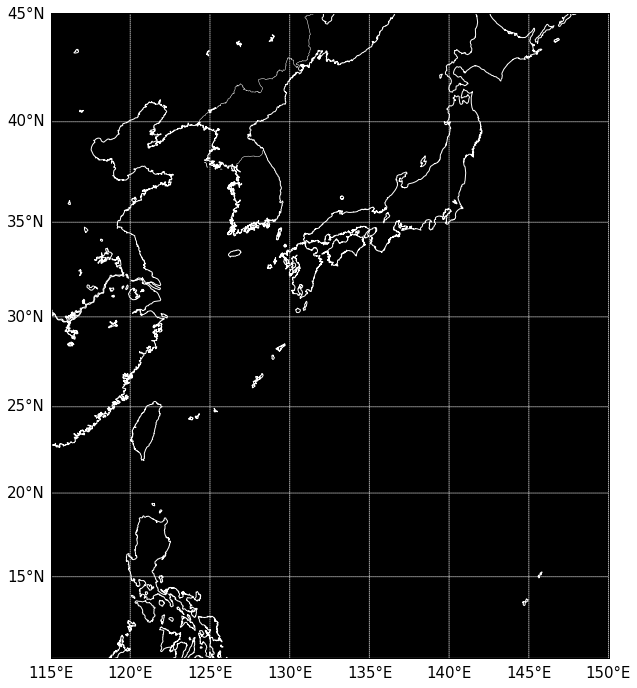

In [ ]:
plt.figure(figsize=(10,20))                                                     # 그림 크기 설정

m = Basemap(projection='merc',                                                  # 도법 설정 : Mercator projection
            resolution = 'i',                                                   # Resultion parameter (c : crude, l : low, h : high, f : full)
            llcrnrlat=10,                                                       # llcrnrlat - lower left corner latitude
            urcrnrlat=45,                                                       # urcrnrlat - upper right corner latitude
            llcrnrlon=115,                                                      # llcrnrlon - lower left corner longitude
            urcrnrlon=150)                                                      # urcrnrlon - upper right corner longitude

m.drawcoastlines(color='w')                                                     # 해안선 표기
m.drawcountries(color='w')                                                      # 국경선 표기
m.drawmapboundary(fill_color='k')                                               # Land 색 설정

parallels = np.arange(10, 50, 5)                                                # 경도 label 설정
m.drawparallels(parallels,labels=[True,False,False,False],                      # 경도 label 위치 설정 (labels = [left,right,top,bottom])
                color='w',                                                      # 경도선 색 설정
                fontsize=15)                                                    # 경도 label 크기 설정

meridians = np.arange(115, 155, 5)                                              # 위도 label 설정
m.drawmeridians(meridians,labels=[False,False,False,True],                      # 위도 label 위치 설정 (labels = [left,right,top,bottom])
                color='w',                                                      # 위도선 색 설정
                fontsize=15)                                                    # 위도 label 크기 설정



---

### **6.2 시각화를 위한 그리드 설정**


In [ ]:
mesh_lon, mesh_lat = np.meshgrid(lon, lat)                                      # 격자 그리드 만들기
m_lon, m_lat=m(mesh_lon, mesh_lat)                                              # 만들어진 격자 그리드를 지정된 basemap에 사용할 수 있게 지정

In [ ]:
# lon, lat, mesh_lon, mesh_lat, m_lon, m_lat shape 확인
print('Lon_shape :', lon.shape)
print('Lat_shape :', lat.shape)

print('mesh_lon_shape :', mesh_lon.shape)
print('mesh_lat_shape :', mesh_lat.shape)

print('m_lon_shape :', m_lon.shape)
print('m_lat_shape :', m_lat.shape)

Lon_shape : (7200,)
Lat_shape : (3600,)
mesh_lon_shape : (3600, 7200)
mesh_lat_shape : (3600, 7200)
m_lon_shape : (3600, 7200)
m_lat_shape : (3600, 7200)



---

### **6.3 Contourf를 통한 시각화 및 X/Y label, title 설정**
* **colormap type 선정** 

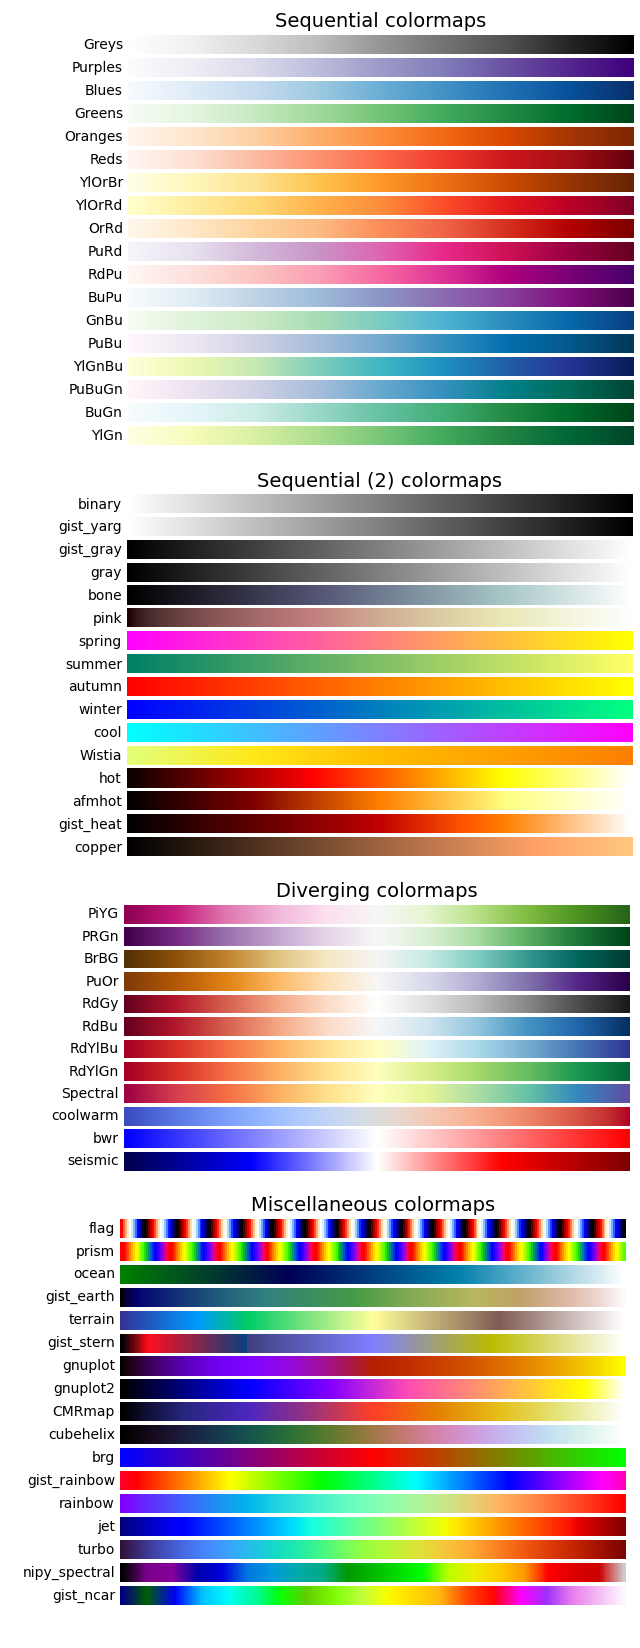

*** matplotlib colormap :** [https://matplotlib.org/stable/tutorials/colors/colormaps.html](https://matplotlib.org/stable/tutorials/colors/colormaps.html)



---


* **conourf 설정 및 X/Y label, title 설정** 


In [ ]:
m.contourf(m_lon, m_lat, sst, 
           levels=np.arange(20, 33, 1),                                         # contourf 개수 설정
           vmin=20, vmax=32,                                                    # contourf 범위 설정
           cmap='jet')                                                          # cmap : colormap 지정

plt.xlabel('Longitude', fontsize=20, fontweight='bold',labelpad=45)             # x축 라벨 설정(fontsize : 글씨 크기, fontweight : 글씨 굵기, labelpad : 여백(padding)지정)
plt.ylabel('Latitude', fontsize=20, fontweight='bold', labelpad=45)             # y축 라벨 설정
plt.title('OSTIA SST(August, 25, 2018)', fontsize=20, fontweight='bold')        # title 설정


---

### **6.4 colorbar 설정**

In [ ]:
cbar=m.colorbar()                                                               # colorbar 선언
cbar.set_label('Sea Surface Temperature [℃]', fontsize=20)                     # colorbar title 설정 및 글씨 크기 설정
cbar.ax.tick_params(labelsize=15)                                               # colorbar tick 설정 및 글씨 크기 설정


---

### **6.5 시각화 그림 저장**

In [ ]:
plt.savefig('OSTIA_SST.png', dpi=200)                                           # dpi(Dots per inch) : 그림 해상도 설정, Default dpi=100


---

### **6.6 실행하기**

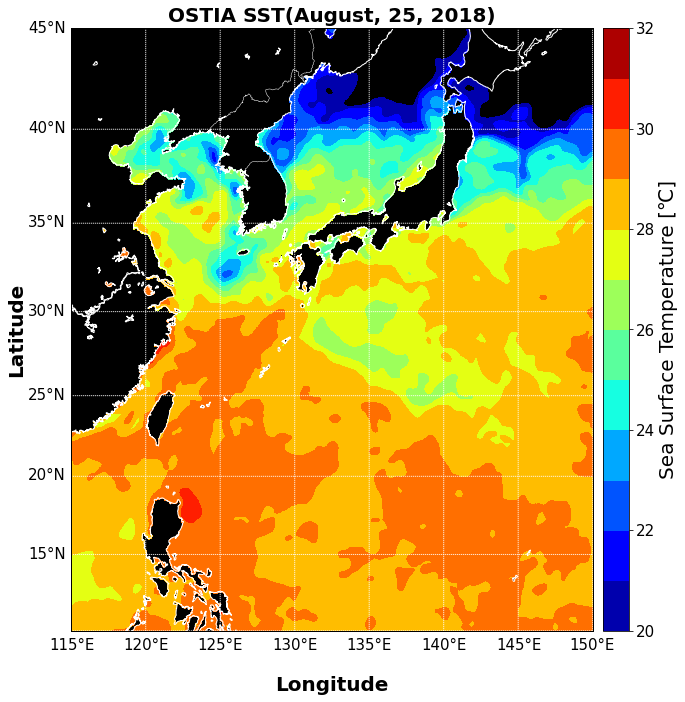

In [ ]:
plt.figure(figsize=(10,20))                                                     # 그림 크기 설정

m = Basemap(projection='merc',                                                  # 도법 설정 : Mercator projection
            resolution = 'i',                                                   # Resultion parameter (c : crude, l : low, h : high, f : full)
            llcrnrlat=10,                                                       # llcrnrlat - lower left corner latitude
            urcrnrlat=45,                                                       # urcrnrlat - upper right corner latitude
            llcrnrlon=115,                                                      # llcrnrlon - lower left corner longitude
            urcrnrlon=150)                                                      # urcrnrlon - upper right corner longitude

m.drawcoastlines(color='w')                                                     # 해안선 표기
m.drawcountries(color='w')                                                      # 국경선 표기
m.drawmapboundary(fill_color='k')                                               # Land 색 설정

parallels = np.arange(10, 50, 5)                                                # 경도 label 설정
m.drawparallels(parallels,labels=[True,False,False,False],                      # 경도 label 위치 설정 (labels = [left,right,top,bottom])
                color='w',                                                      # 경도선 색 설정
                fontsize=15)                                                    # 경도 label 크기 설정

meridians = np.arange(115, 155, 5)                                              # 위도 label 설정
m.drawmeridians(meridians,labels=[False,False,False,True],                      # 위도 label 위치 설정 (labels = [left,right,top,bottom])
                color='w',                                                      # 위도선 색 설정
                fontsize=15)                                                    # 위도 label 크기 설정

mesh_lon, mesh_lat = np.meshgrid(lon, lat)                                      # 격자 그리드 만들기
m_lon, m_lat=m(mesh_lon, mesh_lat)                                              # 만들어진 격자 그리드를 지정된 basemap에 사용할 수 있게 지정

m.contourf(m_lon, m_lat, sst, 
           levels=np.arange(20, 33, 1),                                         # contourf 개수 설정
           vmin=20, vmax=32,                                                    # contourf 범위 설정
           cmap='jet')                                                          # cmap : colormap 지정

plt.xlabel('Longitude', fontsize=20, fontweight='bold',labelpad=45)             # x축 라벨 설정(fontsize : 글씨 크기, fontweight : 글씨 굵기, labelpad : 여백(padding)지정)
plt.ylabel('Latitude', fontsize=20, fontweight='bold', labelpad=45)             # y축 라벨 설정
plt.title('OSTIA SST(August, 25, 2018)', fontsize=20, fontweight='bold')        # title 설정

cbar=m.colorbar()                                                               # colorbar 선언
cbar.set_label('Sea Surface Temperature [℃]', fontsize=20)                     # colorbar title 설정 및 글씨 크기 설정
cbar.ax.tick_params(labelsize=15)                                               # colorbar tick 설정 및 글씨 크기 설정

plt.savefig('OSTIA_SST.png', dpi=200)                                           # dpi(Dots per inch) : 그림 해상도 설정, Default dpi=100



---

##**7. 실습하기**

*   ### **원하는 날짜의 OSTIA 해수면온도 자료를 다운 받기** 
*   ### **다운 받은 OSTIA 해수면온도 자료를 이용하여 원하는 영역에 대해 시각화 해보기**


  

